In [200]:
import numpy as np
import pandas as pd
import keras

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC #Support vector classifier
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout


np.random.seed(42)

In [201]:
data = pd.read_csv('creditcard.csv')

## EDA

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [203]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [204]:
data.shape

(284807, 31)

In [205]:
data.isna().mean()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [206]:
data.duplicated().sum()

1081

In [207]:
data.shape

(284807, 31)

In [208]:
data.drop_duplicates(inplace = True)

In [209]:
data.shape

(283726, 31)

In [210]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [211]:
data.Class.value_counts(normalize=True).round(3)

0    0.998
1    0.002
Name: Class, dtype: float64

In [212]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


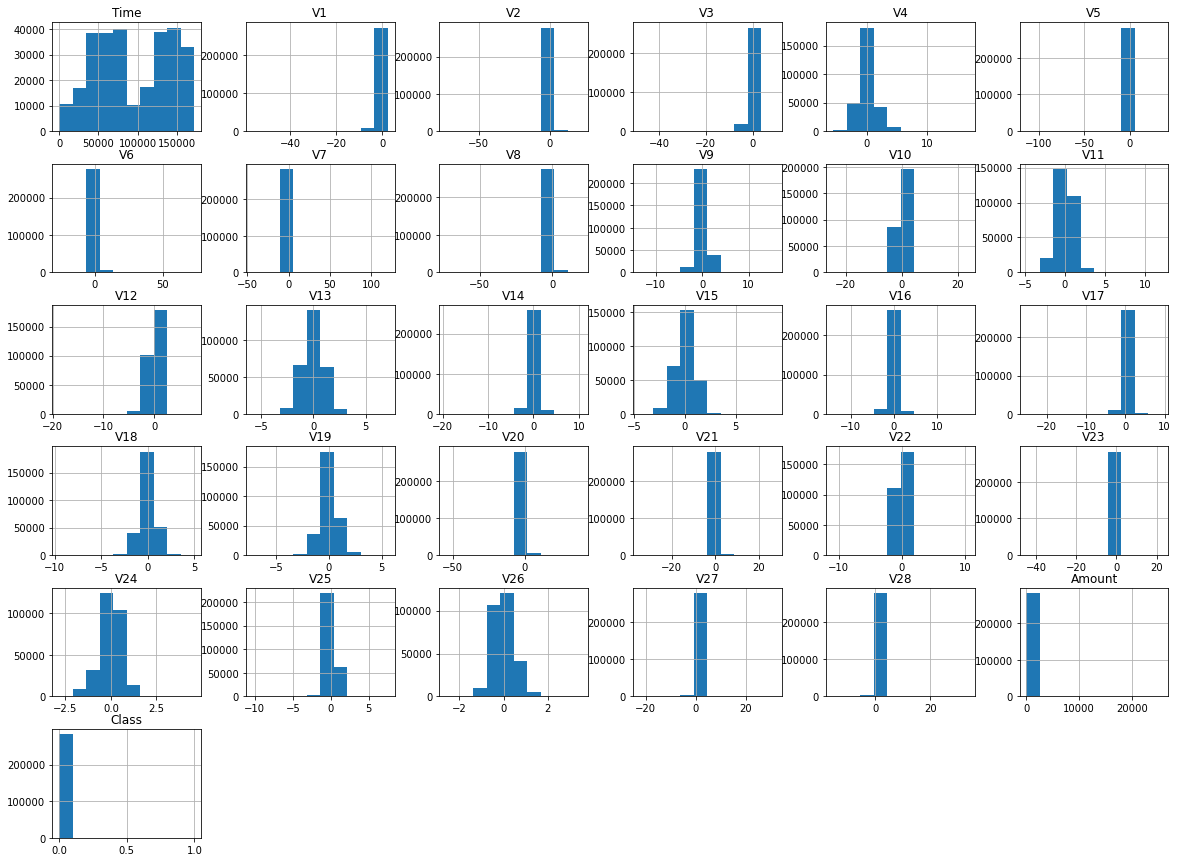

In [213]:
data.hist(figsize = (20, 15));

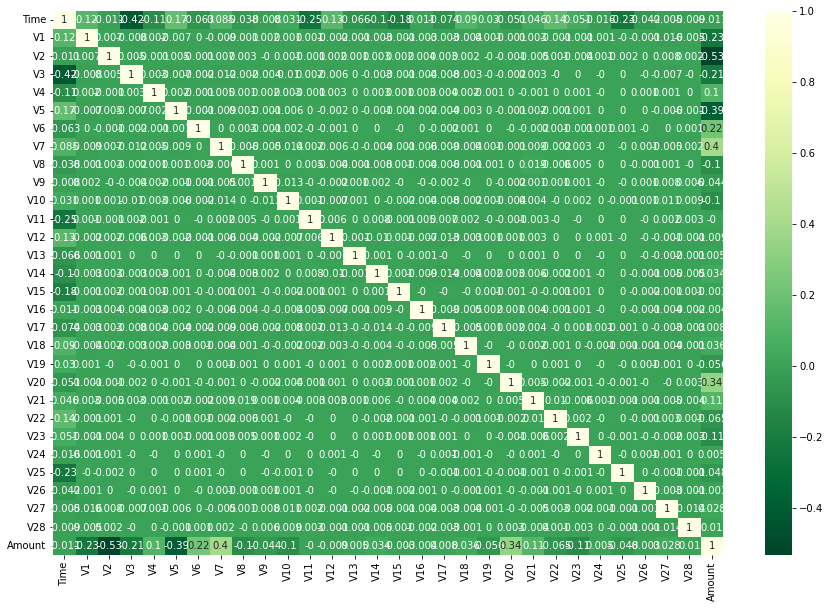

In [214]:
corr = data.drop('Class', axis = 1).corr().round(3)
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, cmap = 'YlGn_r');

## pre-processing

In [215]:
data['NewAmt'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [216]:
data = data.drop(columns=['Amount','Time'], axis=1)

In [217]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NewAmt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


In [218]:
X = data.iloc[:, data.columns != 'Class']
y = data['Class']

In [219]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NewAmt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813


In [220]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [221]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [222]:
X_train.shape

(198608, 29)

In [223]:
X_test.shape

(85118, 29)

In [224]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep learning

In [225]:
NNmodel = Sequential([
    Dense(16, input_dim=29, activation='relu'),
    Dense(24, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [226]:
NNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                480       
                                                                 
 dense_11 (Dense)            (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                500       
                                                                 
 dense_13 (Dense)            (None, 24)                504       
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [227]:
NNmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
NNmodel.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13241/13241 [==============================] - 12s 852us/step - loss: 0.0078 - accuracy: 0.9989
Epoch 2/5
13241/13241 [==============================] - 11s 864us/step - loss: 0.0039 - accuracy: 0.9994
Epoch 3/5
13241/13241 [==============================] - 11s 844us/step - loss: 0.0040 - accuracy: 0.9994
Epoch 4/5
13241/13241 [==============================] - 11s 831us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 5/5
13241/13241 [==============================] - 12s 915us/step - loss: 0.0035 - accuracy: 0.9994


In [228]:
NNscore = NNmodel.evaluate(X_test, y_test)

2660/2660 [==============================] - 2s 607us/step - loss: 0.0034 - accuracy: 0.9994


In [229]:
print(NNscore)

[0.003387290518730879, 0.999389111995697]


2660/2660 [==============================] - 1s 544us/step


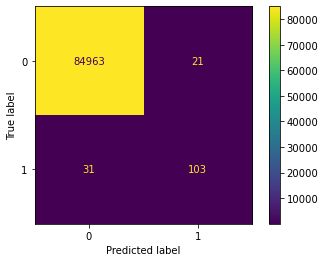

In [230]:
## Deep learning for test data
NNy_pred = NNmodel.predict(X_test)
NNconf_matrix = confusion_matrix(y_test, NNy_pred.round())
NNdisp = ConfusionMatrixDisplay(NNconf_matrix)
NNdisp.plot()
plt.show()

8867/8867 [==============================] - 5s 556us/step


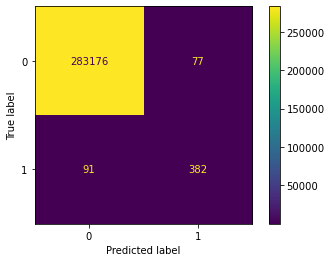

In [231]:
## Deep learning for all data
NNy_pred_all = NNmodel.predict(X)
NNconf_matrix_all = confusion_matrix(y, NNy_pred_all.round())
NNdisp_all = ConfusionMatrixDisplay(NNconf_matrix_all)
NNdisp_all.plot()
plt.show()

In [232]:
NNScore_all = NNmodel.evaluate(X, y)

8867/8867 [==============================] - 5s 562us/step - loss: 0.0027 - accuracy: 0.9994


In [233]:
print(NNScore_all)

[0.0027188549283891916, 0.9994078874588013]


## Random forest

In [234]:
RF = RandomForestClassifier(n_estimators=100)

In [235]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [236]:
RFy_pred=RF.predict(X_test)

In [237]:
RFScore = RF.score(X_test,y_test)
print(RFScore)

0.999530064146244


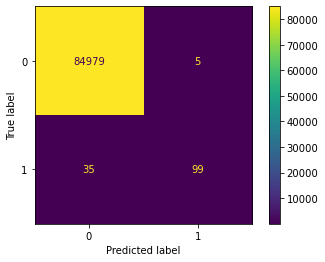

In [238]:
## confusion matrix for test data
RFconf_matrix = confusion_matrix(y_test, RFy_pred)
RFdisp = ConfusionMatrixDisplay(RFconf_matrix)
RFdisp.plot()
plt.show()

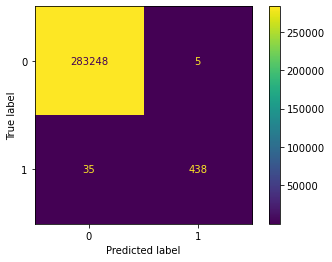

In [239]:
## confusion matrix for all data
RFy_pred_all = RF.predict(X.values)
RFconf_matrix_all = confusion_matrix(y, RFy_pred_all)
RFdisp_all = ConfusionMatrixDisplay(RFconf_matrix_all)
RFdisp_all.plot()
plt.show()

In [240]:
RFScore_all = RF.score(X.values,y)
print(RFScore_all)

0.9998590189126129


## Decision tree

In [241]:
DT = DecisionTreeClassifier()

In [242]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [243]:
DTy_pred = DT.predict(X_test)

In [244]:
DTScore = DT.score(X_test,y_test)
print(DTScore)

0.999060128292488


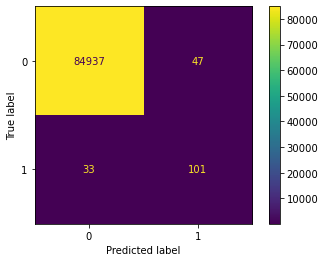

In [245]:
## confusion matrix for test data
DTconf_matrix = confusion_matrix(y_test, DTy_pred)
DTdisp = ConfusionMatrixDisplay(DTconf_matrix)
DTdisp.plot()
plt.show()

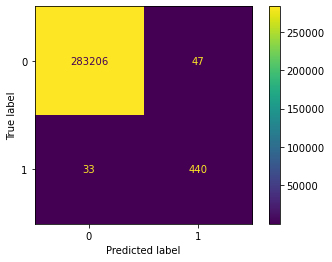

In [246]:
## confusion matrix for all data
DTy_pred_all = DT.predict(X.values)
DTconf_matrix_all = confusion_matrix(y, DTy_pred_all)
DTdisp_all = ConfusionMatrixDisplay(DTconf_matrix_all)
DTdisp_all.plot()
plt.show()

In [247]:
DTScore_all = DT.score(X.values,y)
print(DTScore_all)

0.9997180378252257


## KNN

In [248]:
KN = KNeighborsClassifier(n_neighbors=5)

In [249]:
KN.fit(X_train,y_train)

KNeighborsClassifier()

In [250]:
KNy_pred = KN.predict(X_test)

In [251]:
KNScore = KN.score(X_test,y_test)
print(KNScore)

0.9994713221645245


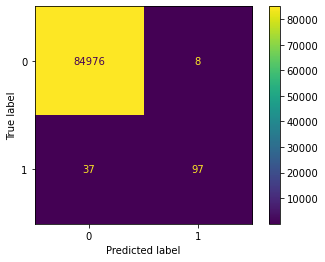

In [252]:
## confusion matrix for test data
KNconf_matrix = confusion_matrix(y_test, KNy_pred)
KNdisp = ConfusionMatrixDisplay(KNconf_matrix)
KNdisp.plot()
plt.show()

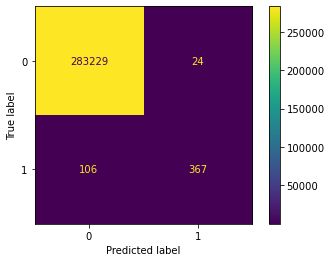

In [253]:
## confusion matrix for all data
KNy_pred_all = KN.predict(X.values)
KNconf_matrix_all = confusion_matrix(y, KNy_pred_all)
KNdisp_all = ConfusionMatrixDisplay(KNconf_matrix_all)
KNdisp_all.plot()
plt.show()

In [254]:
KNScore_all = KN.score(X.values,y)
print(KNScore_all)

0.9995418114659919


# SMOTE - oversampling

In [255]:
# run following if required
# pip install -U imbalanced-learn

In [256]:
from imblearn.over_sampling import SMOTE

In [257]:
sm = SMOTE(random_state=42)

In [258]:
X_over, y_over = sm.fit_resample(X,y)

In [259]:
X_o_train, X_o_test, y_o_train, y_o_test = train_test_split(X_over, y_over, test_size = 0.3, random_state=42)

In [260]:
X_o_train = np.array(X_o_train)
X_o_test = np.array(X_o_test)
y_o_train = np.array(y_o_train)
y_o_test = np.array(y_o_test)

In [261]:
NNmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
NNmodel.fit(X_o_train,y_o_train,batch_size=15,epochs=5)

Epoch 1/5
26437/26437 [==============================] - 26s 977us/step - loss: 0.0321 - accuracy: 0.9882
Epoch 2/5
26437/26437 [==============================] - 25s 964us/step - loss: 0.0126 - accuracy: 0.9965
Epoch 3/5
26437/26437 [==============================] - 26s 971us/step - loss: 0.0096 - accuracy: 0.9975
Epoch 4/5
26437/26437 [==============================] - 25s 950us/step - loss: 0.0089 - accuracy: 0.9979
Epoch 5/5
26437/26437 [==============================] - 25s 952us/step - loss: 0.0079 - accuracy: 0.9981


In [262]:
NNMscore = NNmodel.evaluate(X_o_test, y_o_test)

5311/5311 [==============================] - 3s 637us/step - loss: 0.0061 - accuracy: 0.9987


In [263]:
print(NNMscore)

[0.00610443064942956, 0.9987407922744751]


5311/5311 [==============================] - 3s 566us/step


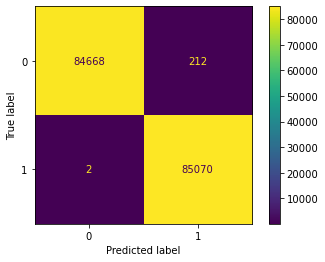

In [264]:
## confusion matrix for test data
SMy_pred = NNmodel.predict(X_o_test)
SMconf_matrix = confusion_matrix(y_o_test, SMy_pred.round())
SMdisp = ConfusionMatrixDisplay(SMconf_matrix)
SMdisp.plot()
plt.show()

17704/17704 [==============================] - 10s 572us/step


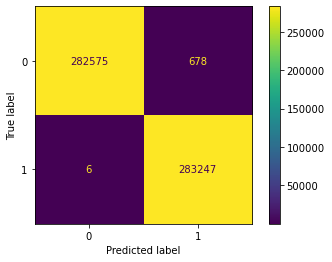

In [265]:
## confusion matrix for all data
SMy_pred_all = NNmodel.predict(X_over)
SMconf_matrix_all = confusion_matrix(y_over, SMy_pred_all.round())
SMdisp_all = ConfusionMatrixDisplay(SMconf_matrix_all)
SMdisp_all.plot()
plt.show()

In [266]:
NNMScore_all = NNmodel.evaluate(X_over, y_over)

17704/17704 [==============================] - 12s 651us/step - loss: 0.0058 - accuracy: 0.9988


In [267]:
print(NNMScore_all)

[0.005788866896182299, 0.9987925887107849]


In [272]:
res_dict = {'model': ['Deep Learning', 'Random Forest', 'Decision Tree', 'KNN', 'Deep learning with SMOTE'],
           'Test score': [0.999389111995697, 0.999530064146244, 0.999060128292488, 0.9994713221645245,0.9987407922744751],
           'Score for All': [0.9994078874588013, 0.9998590189126129, 0.9997180378252257, 0.9995418114659919,0.9987925887107849],
           'False positive-Test': [21, 5, 47, 8,212],
           'False positive-All': [77, 5, 47, 24,678],
           'False negative-Test': [31, 35, 33, 37, 2],
           'False negative-All': [91, 35, 33, 106, 6]}
results_df = pd.DataFrame(res_dict).set_index('model')
results_df


,Test score,Score for All,False positive-Test,False positive-All,False negative-Test,False negative-All
model,,,,,,
Deep Learning,0.999389,0.999408,21,77,31,91
Random Forest,0.999530,0.999859,5,5,35,35
Decision Tree,0.999060,0.999718,47,47,33,33
KNN,0.999471,0.999542,8,24,37,106
Deep learning with SMOTE,0.998741,0.998793,212,678,2,6


<AxesSubplot:xlabel='model'>

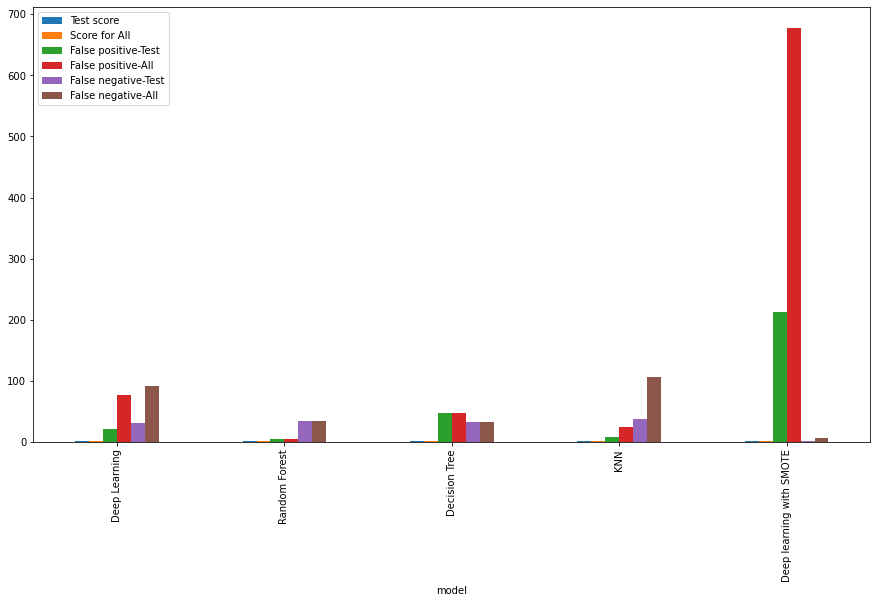

In [273]:
results_df.plot(kind='bar', figsize=(15, 8))